# Путинцев Данил P3307. Диабет. Логическая регрессия. Лабораторная работа №6

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings

df = pd.read_csv("./diabetes.csv")

Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.

In [37]:
if not df.isna().any().any():
    print("В данных нет пустых значений.")
else:
    df.dropna(inplace=True)
    print("Пустые значения был удалены.")

X = df.drop('Outcome', axis=1)
Y = df['Outcome']

В данных нет пустых значений.


Категориальных признаков нет

Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

Статистика по столбцу Pregnancies
Количество: 768
Максимальное значение: 17
Среднее значение: 3.8450520833333335
Минимальное значение: 0
Стандартное отклонение: ±3.3695780626988623
25% квантиль: 1
50% квантиль (медиана): 3
75% квантиль: 6

Статистика по столбцу Glucose
Количество: 768
Максимальное значение: 199
Среднее значение: 120.89453125
Минимальное значение: 0
Стандартное отклонение: ±31.97261819513622
25% квантиль: 99
50% квантиль (медиана): 117
75% квантиль: 141

Статистика по столбцу BloodPressure
Количество: 768
Максимальное значение: 122
Среднее значение: 69.10546875
Минимальное значение: 0
Стандартное отклонение: ±19.355807170644777
25% квантиль: 62
50% квантиль (медиана): 72
75% квантиль: 80

Статистика по столбцу SkinThickness
Количество: 768
Максимальное значение: 99
Среднее значение: 20.536458333333332
Минимальное значение: 0
Стандартное отклонение: ±15.952217567727677
25% квантиль: 0
50% квантиль (медиана): 23
75% квантиль: 32

Статистика по столбцу Insulin
Количество: 

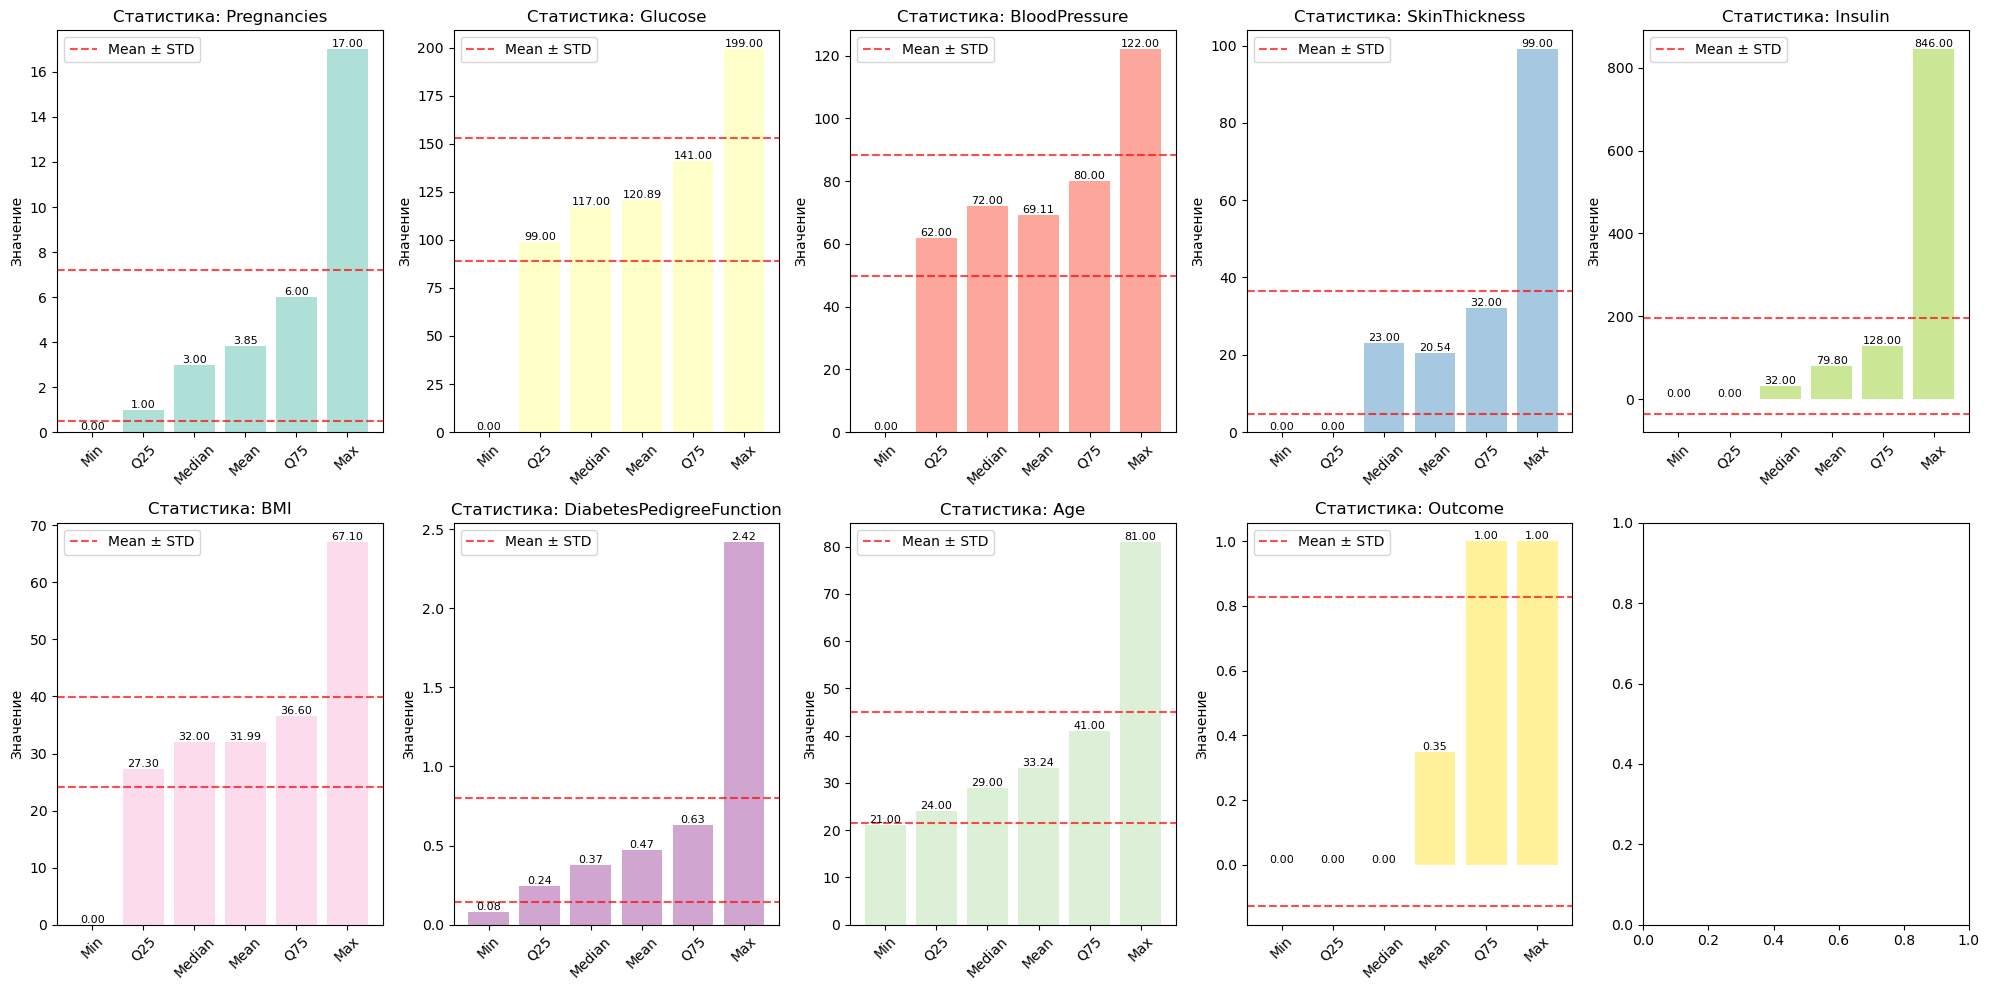

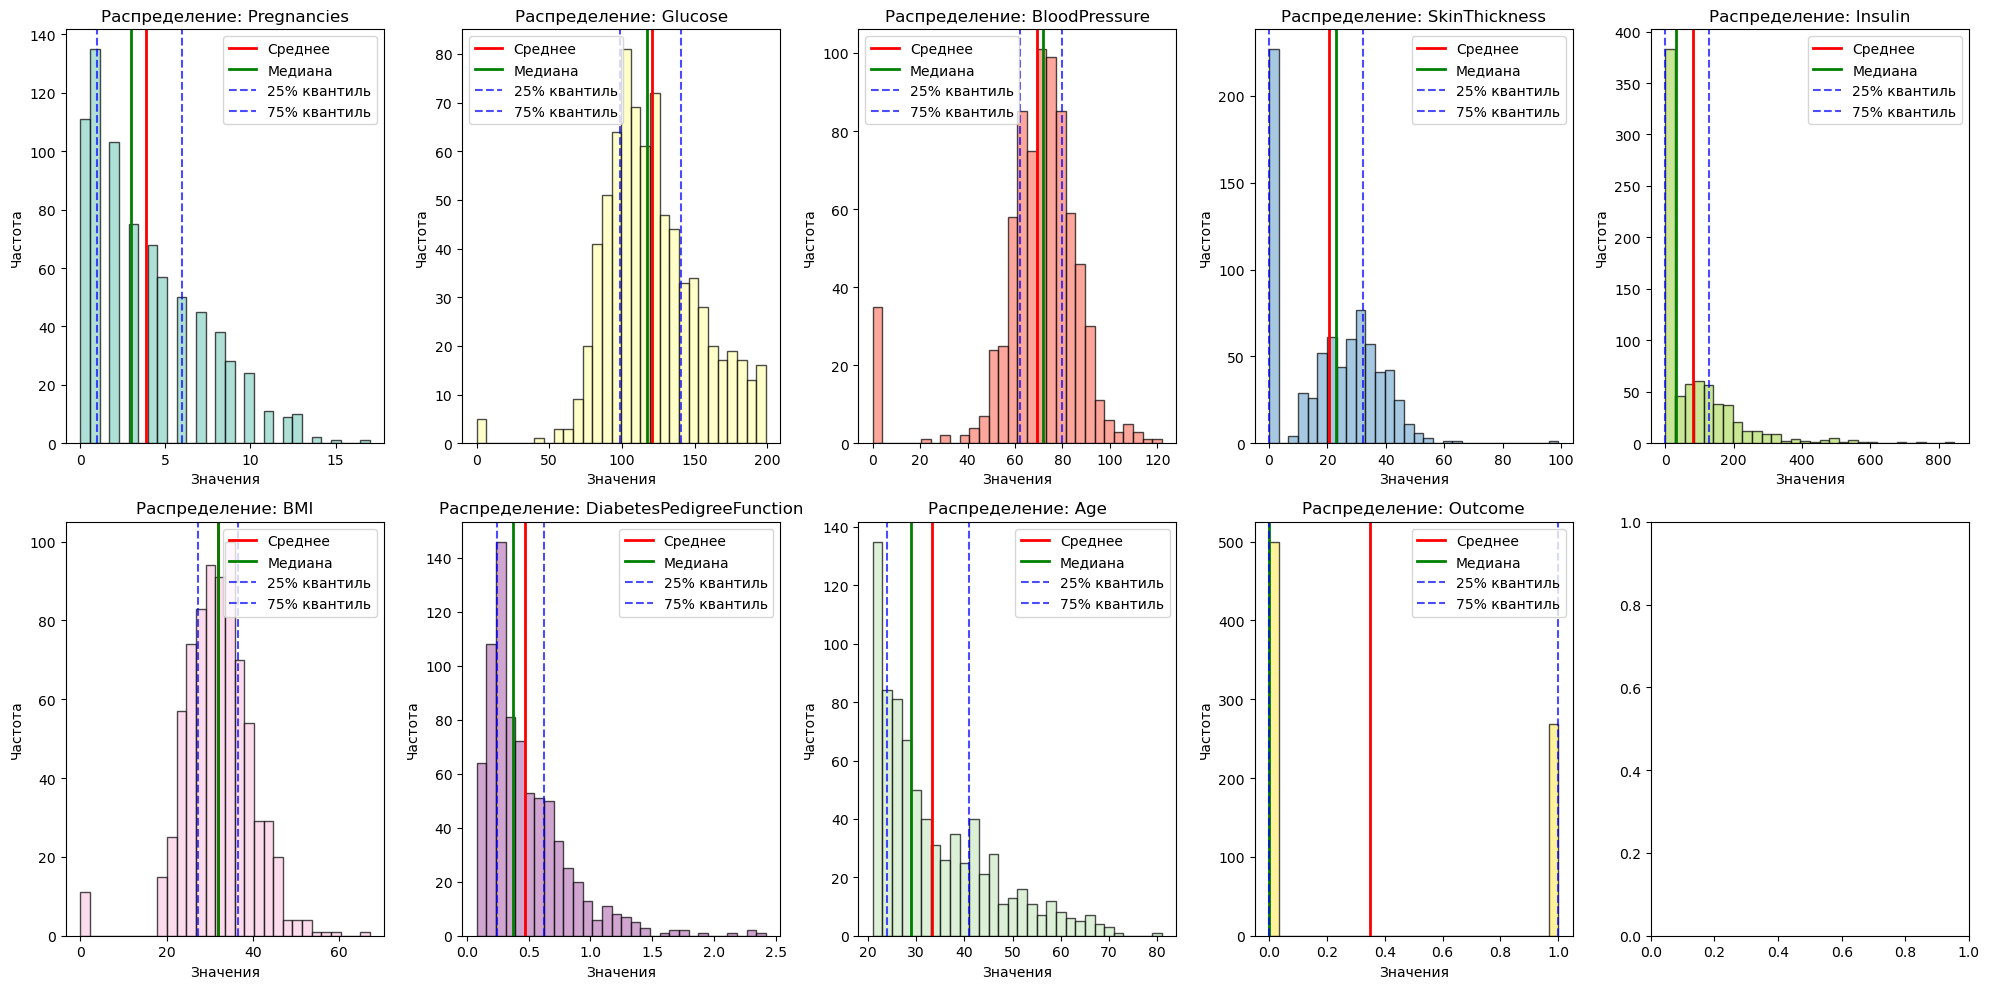

In [38]:
def get_stdev(column, mean, count):
    var = 0
    for item in column:
        var += (mean-item)**2
    var = var / (count - 1)
    return var**0.5

def get_column_stat(column, name_column):
    count = 0
    max_value = -10**20
    min_value = 10**20
    sum_value = 0
    
    for item in column:
        count += 1
        if max_value < item:
            max_value = item
        if min_value > item:
            min_value = item
        sum_value += item

    mean = sum_value / count
    stdev = get_stdev(column, mean, count)
    
    sorted_column = sorted(column)
    quantile_25 = sorted_column[int(0.25 * count)]
    quantile_50 = sorted_column[int(0.5 * count)]  
    quantile_75 = sorted_column[int(0.75 * count)]
    
    print("Статистика по столбцу", name_column)
    print("Количество:", count)
    
def get_stdev(column, mean, count):
    var = 0
    for item in column:
        var += (mean-item)**2
    var = var / (count - 1)
    return var**0.5

def get_column_stat(column, name_column):
    count = 0
    max_value = -10**20
    min_value = 10**20
    sum_value = 0
    
    for item in column:
        count += 1
        if max_value < item:
            max_value = item
        if min_value > item:
            min_value = item
        sum_value += item

    mean = sum_value / count
    stdev = get_stdev(column, mean, count)
    
    sorted_column = sorted(column)
    quantile_25 = sorted_column[int(0.25 * count)]
    quantile_50 = sorted_column[int(0.5 * count)] 
    quantile_75 = sorted_column[int(0.75 * count)]
    
    print("Статистика по столбцу", name_column)
    print("Количество:", count)
    print("Максимальное значение:", max_value)
    print("Среднее значение:", mean)
    print("Минимальное значение:", min_value)
    print("Стандартное отклонение: ±" + str(stdev))
    print("25% квантиль:", quantile_25)
    print("50% квантиль (медиана):", quantile_50)
    print("75% квантиль:", quantile_75)
    
    return {
        'count': count,
        'mean': mean,
        'std': stdev,
        'min': min_value,
        'max': max_value,
        'q25': quantile_25,
        'q50': quantile_50,
        'q75': quantile_75
    }
    print("Максимальное значение:", max_value)
    print("Среднее значение:", mean)
    print("Минимальное значение:", min_value)
    print("Стандартное отклонение: ±" + str(stdev))
    print("25% квантиль:", quantile_25)
    print("50% квантиль (меX_test = X_test.copy() диана):", quantile_50)
    print("75% квантиль:", quantile_75)
    
    return {
        'count': count,
        'mean': mean,
        'std': stdev,
        'min': min_value,
        'max': max_value,
        'q25': quantile_25,
        'q50': quantile_50,
        'q75': quantile_75
    }

def visualize_statistics(stats_dict):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.ravel()
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(stats_dict)))
    
    for i, (col_name, stats) in enumerate(stats_dict.items()):
        metrics = ['Min', 'Q25', 'Median', 'Mean', 'Q75', 'Max']
        values = [stats['min'], stats['q25'], stats['q50'], 
                 stats['mean'], stats['q75'], stats['max']]
        
        bars = axes[i].bar(metrics, values, color=colors[i], alpha=0.7)
        axes[i].set_title(f'Статистика: {col_name}')
        axes[i].set_ylabel('Значение')
        
        for bar, value in zip(bars, values):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{value:.2f}', ha='center', va='bottom', fontsize=8)
        
        axes[i].axhline(y=stats['mean'] + stats['std'], color='red', 
                       linestyle='--', alpha=0.7, label='Mean ± STD')
        axes[i].axhline(y=stats['mean'] - stats['std'], color='red', 
                       linestyle='--', alpha=0.7)
        axes[i].legend()
        
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.ravel()
    
    for i, (col_name, stats) in enumerate(stats_dict.items()):
        axes[i].hist(df[col_name], bins=30, alpha=0.7, color=colors[i], 
                    edgecolor='black')
        axes[i].set_title(f'Распределение: {col_name}')
        axes[i].set_xlabel('Значения')
        axes[i].set_ylabel('Частота')
        
        axes[i].axvline(stats['mean'], color='red', linestyle='-', 
                       linewidth=2, label='Среднее')
        axes[i].axvline(stats['q50'], color='green', linestyle='-', 
                       linewidth=2, label='Медиана')
        axes[i].axvline(stats['q25'], color='blue', linestyle='--', 
                       alpha=0.7, label='25% квантиль')
        axes[i].axvline(stats['q75'], color='blue', linestyle='--', 
                       alpha=0.7, label='75% квантиль')
        axes[i].legend()
    
    plt.tight_layout()
    plt.show()

def get_stat():
    dictionary = {
        "Pregnancies": df["Pregnancies"],
        "Glucose": df["Glucose"],
        "BloodPressure": df["BloodPressure"],
        "SkinThickness": df["SkinThickness"],
        "Insulin": df["Insulin"],
        "BMI": df["BMI"],
        "DiabetesPedigreeFunction": df["DiabetesPedigreeFunction"],
        "Age": df["Age"],
        "Outcome": df["Outcome"]
    }
    
    stats_dict = {}
    
    for key, value in dictionary.items():
        print("=" * 50)
        stats_dict[key] = get_column_stat(value, key)
        print("=" * 50)
        print()
    
    visualize_statistics(stats_dict)

get_stat()

Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим.

In [39]:
# Список индексов данных
indices = list(range(len(X)))

# Размер тестовой выборки
test_size = 0.2 # 20%

# Начальное состояние генератора случайных чисел
random.seed(42)
# Перемешиваем индексы, чтобы при делении данных они были представлены случайным образом
random.shuffle(indices)

split_index = int(len(X) * test_size)
# Разделение данных Индексы используются для извлечения соответствующих частей данных
X_train = X.iloc[indices[split_index:]]
X_test = X.iloc[indices[:split_index]]
Y_train = Y.iloc[indices[split_index:]]
Y_test = Y.iloc[indices[:split_index]]

In [40]:
print('X_train ->', X_train.shape)
print('X_test ->', X_test.shape)
print('Y_train ->', Y_train.shape)
print('Y_test ->', Y_test.shape)

X_train -> (615, 8)
X_test -> (153, 8)
Y_train -> (615,)
Y_test -> (153,)


In [54]:
X_test = X_test.copy() 
X_train = X_train.copy() 
# масштабирует значения в столбце так, чтобы они находились в диапазоне от 0 до 1.
for column_name, params in X_test.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X_test[column_name] = (X_test[column_name] - minimum) / difference

for column_name, params in X_train.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X_train[column_name] = (X_train[column_name] - minimum) / difference

## Реализация метода логистической регресии

Определяем сигмоидную функцию и функцию потерь ( принимает два аргумента: Y_actual - фактические метки классов (0 или 1), и Y_predicted - предсказанные вероятности принадлежности к классу 1)

In [55]:
def sig(t):
    result = np.zeros_like(t)
    
    pos_mask = t >= 0
    if np.any(pos_mask):
        exp_neg_t = np.exp(-t[pos_mask])
        result[pos_mask] = 1 / (1 + exp_neg_t)
    
    neg_mask = t < 0
    if np.any(neg_mask):
        exp_t = np.exp(t[neg_mask])
        result[neg_mask] = exp_t / (1 + exp_t)
    
    return result
# насколько хорошо, модель предсказывавет метки
def cost(Y_actual, Y_predicted):
    epsilon = 1e-15
    Y_predicted = np.clip(Y_predicted, epsilon, 1 - epsilon)
    return -np.mean(Y_actual * np.log(Y_predicted) + (1 - Y_actual) * np.log(1 - Y_predicted))

Определяем методы обучения

Обновление весов и смещения в направлении, противоположном градиенту, с использованием заданной скорости обучения, является ключным шагом в градиентном спуске. Этот подход направлен на минимизацию функции потерь и обеспечивает сходимость алгоритма обучения. обновление весов и смещения в направлении, противоположном градиенту, помогает двигаться в сторону минимума функции потерь.

(z - Y_train): Разность между предсказанными вероятностями и истинными метками. np.dot(X_train.T, (z - Y_train)): Скалярное произведение матрицы признаков и разности предсказанных и истинных значений. (1 / objects_num): Нормализация по числу объектов в обучающей выборке.

In [56]:
# Градиентный спуск
def gradient_descent(X_train, Y_train, iterations, learning_rate):
    objects_num, characteristics_num = X_train.shape
    #Веса и смещение инициализируются нулями.
    weights = np.zeros(characteristics_num)
    losses = []
    bias = 0
    # Рассчет предсказанных значений и градиентов (Рассчитываются предсказанные значения (z) и градиенты по весам (dw) и по смещению (db))
    for iteration in range(1, iterations + 1):

        t = np.dot(X_train, weights) + bias
        #  prediction
        z = sig(t)
        # по весам
        dw = (1 / objects_num) * np.dot(X_train.T, (z - Y_train))
        # по смещению
        db = (1 / objects_num) * np.sum(z - Y_train)
        # Веса и смещение обновляются в направлении, противоположном градиенту, с использованием заданной скорости обучения (learning_rate).
        weights -= learning_rate * dw
        bias -= learning_rate * db

        #Функция потерь записывается каждые 100 итераций для отслеживания процесса обучения.
        if iteration % 100 == 0:
            loss = cost(Y_train, z)
            losses.append(loss)
    #Возвращение коэффициентов и функции потерь
    coeff = {'weights': weights, 'bias': bias}
    return coeff, losses
     

In [57]:
# Оптимизация Ньютона
def newton_optimization(X_train, Y_train, iterations):
    objects_num, characteristics_num = X_train.shape

    weights = np.zeros(characteristics_num)
    losses = []
    bias = 0

    for iteration in range(1, iterations + 1):

        t = np.dot(X_train, weights) + bias
        #  prediction
        z = sig(t)

        # по весам
        dw = (1 / objects_num) * np.dot(X_train.T, (z - Y_train))
        # по смещению
        db = (1 / objects_num) * np.sum(z - Y_train)
        # матрицу вторых производных функции потерь относительно весов. Он используется для определения направления и размера шага в методе Ньютона.
        hessian = (1 / objects_num) * (X_train.T @ ((z * (1 - z)) * X_train.T).T)

        weights -= np.linalg.inv(hessian) @ dw
        bias -= db

        if iteration % 100 == 0:
            loss = cost(Y_train, z)
            losses.append(loss)
            # print(f'{iteration}) cost = {loss}')

    coeff = {'weights': weights, 'bias': bias}
    return coeff, losses
     

In [58]:
# Определяем функцию предсказания
def predict(X_test, coeff):
    #Извлекаются веса и смещение из словаря coeff
    weights = coeff['weights']
    bias = coeff['bias']
    # применяется сигмоидная функция для получения вероятностей принадлежности к классу 1.
    t = np.dot(X_test, weights) + bias

    z = sig(t)
# Функция возвращает бинарные предсказания: 1, если вероятность превышает порог 0.6
    return (z > 0.6).astype(int)

## Оценка модели

Определим функцию для подсчета метрик

In [59]:
def calculate_metrics(Y_prediction, Y_test):
    TP = np.sum((Y_prediction == 1) & (Y_test == 1))
    TN = np.sum((Y_prediction == 0) & (Y_test == 0))
    FP = np.sum((Y_prediction == 1) & (Y_test == 0))
    FN = np.sum((Y_prediction == 0) & (Y_test == 1))

    # Точность (Accuracy): доля правильных предсказаний
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) != 0 else 0
    # Точность (Precision): доля правильно предсказанных положительных классов относительно всех предсказанных положительных классов
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    # Полнота (Recall): доля правильно предсказанных положительных классов относительно всех фактически положительных классов
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    # F1-мера (F1 Score): среднее гармоническое между точностью и полнотой
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    return {'accuracy': accuracy, 'precision': precision,  'recall': recall, 'f1_score': f1_score}

Исследование гиперпараметров (скорости обучения и числа итераций)

In [60]:
 # Создадим вариации гиперпараметров (скорости обучения и числа итераций).
rates = [0.01, 0.2, 0.375, 0.5]
iterations = [100, 1000, 5000]

In [61]:
max_f1_score = 0
best_params = {}
table = PrettyTable(['method', 'rate', 'iterations', 'accuracy', 'precision', 'recall', 'f1_score', 'losses'])
table.align['rate'] = "l"
table.align['iterations'] = "l"
table.align['accuracy'] = "l"
table.align['precision'] = "l"
table.align['recall'] = "l"
table.align['f1_score'] = "l"
table.align['losses'] = "l"

# Для метода градиентного спуска.пробегают по всем комбинациям скоростей и чисел итераций.
# Для каждой комбинации обучается модель методом градиентного спуска, делается предсказание и вычисляются метрики производительности.
for rate in rates:
    for iteration in iterations:

        coeff, losses = gradient_descent(X_train, Y_train, iteration, rate)
        Y_prediction = predict(X_test, coeff)

        metrics = calculate_metrics(Y_prediction, Y_test)
        #Если значение F1-меры превышает текущий максимум, обновляются лучшие параметры.
        if (metrics['f1_score'] > max_f1_score):
            best_params = {'method': gradient_descent.__name__, 'rate': rate, 'iterations': iteration, 'accuracy': metrics['accuracy'], 'precision': metrics['precision'], 'recall': metrics['recall'], 'f1_score': metrics['f1_score'], 'losses': losses[0] - losses[len(losses) - 1]}

        table.add_row([gradient_descent.__name__, rate, iteration, metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1_score'], losses[0] - losses[len(losses) - 1]])

# Для метода Ньютона
for iteration in iterations:

    coeff, losses = newton_optimization(X_train, Y_train, iteration)
    Y_prediction = predict(X_test, coeff)

    metrics = calculate_metrics(Y_prediction, Y_test)

    if (metrics['f1_score'] > max_f1_score):
        best_params = {'method': newton_optimization.__name__, 'rate': '-', 'iterations': iteration, 'accuracy': metrics['accuracy'], 'precision': metrics['precision'], 'recall': metrics['recall'], 'f1_score': metrics['f1_score'], 'losses': losses[0] - losses[len(losses) - 1]}

    table.add_row([newton_optimization.__name__, '-', iteration, metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1_score'], losses[0] - losses[len(losses) - 1]])

print(table)

+---------------------+-------+------------+--------------------+--------------------+---------------------+---------------------+----------------------+
|        method       | rate  | iterations | accuracy           | precision          | recall              | f1_score            | losses               |
+---------------------+-------+------------+--------------------+--------------------+---------------------+---------------------+----------------------+
|   gradient_descent  | 0.01  | 100        | 0.6013071895424836 | 0                  | 0.0                 | 0                   | 0.0                  |
|   gradient_descent  | 0.01  | 1000       | 0.6013071895424836 | 0                  | 0.0                 | 0                   | 0.029989532332527657 |
|   gradient_descent  | 0.01  | 5000       | 0.6013071895424836 | 0                  | 0.0                 | 0                   | 0.08038821404821395  |
|   gradient_descent  | 0.2   | 100        | 0.6013071895424836 | 0         

In [63]:
best_params_table = PrettyTable(['method', 'rate', 'iterations', 'accuracy', 'precision', 'recall', 'f1_score', 'losses'])
best_params_table.add_row([best_params['method'], best_params['rate'], best_params['iterations'], best_params['accuracy'], best_params['precision'], best_params['recall'], best_params['f1_score'], best_params['losses']])
print(best_params_table)

+---------------------+------+------------+--------------------+-----------+--------------------+-------------------+---------------------+
|        method       | rate | iterations |      accuracy      | precision |       recall       |      f1_score     |        losses       |
+---------------------+------+------------+--------------------+-----------+--------------------+-------------------+---------------------+
| newton_optimization |  -   |    5000    | 0.7189542483660131 |    0.75   | 0.4426229508196721 | 0.556701030927835 | 0.05782816516573319 |
+---------------------+------+------------+--------------------+-----------+--------------------+-------------------+---------------------+
